<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Univariant Curves for T-logK or P-logK diagrams</h1><br />
</tr>
</table>
</left>

In [1]:
from pyCHNOSZ import *
_ = thermo("WORM")

The WORM thermodynamic database has been loaded: 1639 aqueous, 1890 total species


As we saw in the `2-Univariant-Curves-T-P.ipynb` demo, we can model the equilibrium between calcite and aragonite and visualize the results with a univariant curve with temperature and pressure axes.

$$\text{calcite} = \text{aragonite}$$

But what if we have specific temperature value(s) and a logK in mind, and we want to solve for the pressure associated with those values?

For example, what if we want the pressures corresponding to logK=0 at 350, 400, 450, and 500 °C?

We can't do that with the the `univariant_TP()` function from the last demo.

Instead, we can use a function called `unicurve()`. The function is set up in a very similar way:

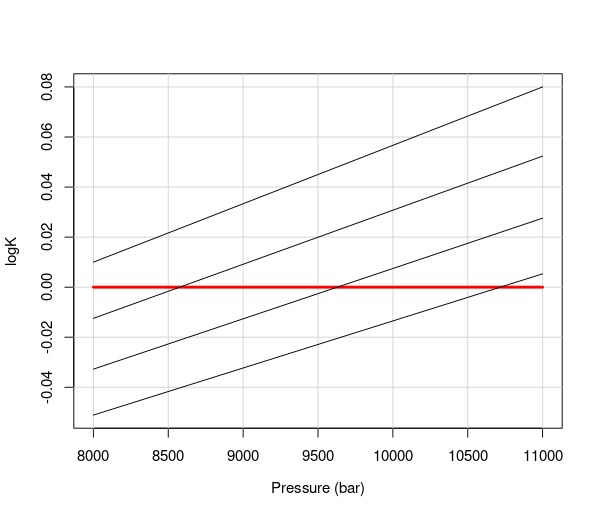

In addition: 
Warning messages:

1: 
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :

 
 library ‘/usr/lib/R/site-library’ contains no packages

2: 
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :

 
 library ‘/usr/lib/R/site-library’ contains no packages

3: 
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :

 
 library ‘/usr/lib/R/site-library’ contains no packages

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 623.15 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 673.15 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 723.15 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 

,coeff,name,formula,state,ispecies
769,-1,calcite,CaCO3,cr,769.0
820,1,aragonite,CaCO3,cr,820.0


,P,T,logK,G,H,S,V,Cp,Warning
1,NaN,350.0,NaN,NaN,NaN,NaN,NaN,NaN,Could not converge on P for this T within 8000...
2,8576.387,400.0,0.0,-0.0,-923.0,-1.4,-2.8,-0.9,None
3,9628.785,450.0,-0.0,0.0,-1032.0,-1.4,-2.8,-0.7,None
4,10717.015,500.0,0.0,-0.0,-1134.0,-1.5,-2.8,-0.5,None


In [2]:
unicurve(solve="P", # solving for pressure
         logK=0, # desired logK
         species=["calcite", "aragonite"], # chemical species
         state=["cr", "cr"], # aq, gas, liq, cr
         coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
         temperatures=[350, 400, 450, 500], # the temperatures used to calculate pressures
         minP=8000, maxP=11000, # the minimum and maximum in a range of pressures to search
         plot_it=True, # visualize results
         messages=True, # print messages
         )

We were able to calculate pressures for 400, 450, and 500 °C for logK=0. These pressures appear in the "P" column in the table above. Note these pressures correspond to the intersection of the three black curves and the red horizontal line at logK=0 in the plot above.

However, the code was unable to find a pressure corresponding to 350 °C in the pressure range we provided. This is represented by the uppermost black curve that does not cross the red line at logK=0. We can try adjusting the minimum pressure in our range to capture an intersection:

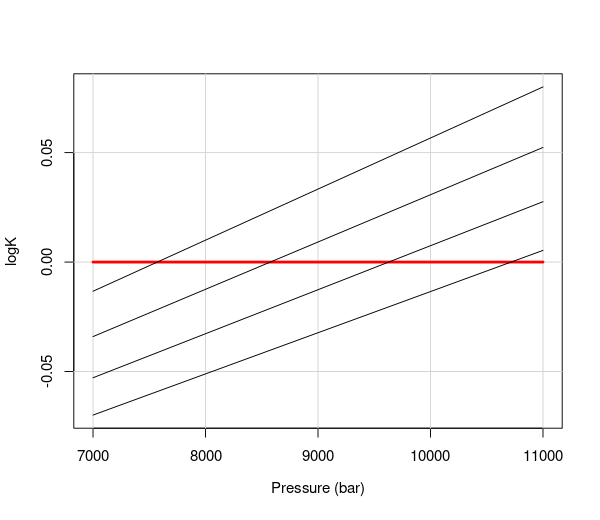

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 623.15 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 673.15 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 723.15 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 773.15 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 623.15 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 673.15 K and above exceed limit for aragonite cr (extr

,coeff,name,formula,state,ispecies
769,-1,calcite,CaCO3,cr,769.0
820,1,aragonite,CaCO3,cr,820.0


,P,T,logK,G,H,S,V,Cp
1,7571.551,350.0,-0.0,0.0,-810.0,-1.3,-2.8,-1.0
2,8576.374,400.0,0.0,-0.0,-923.0,-1.4,-2.8,-0.9
3,9628.772,450.0,-0.0,0.0,-1032.0,-1.4,-2.8,-0.7
4,10717.027,500.0,0.0,-0.0,-1134.0,-1.5,-2.8,-0.5


In [3]:
unicurve(solve="P", # solving for pressure
         logK=0, # desired logK
         species=["calcite", "aragonite"], # chemical species
         state=["cr", "cr"], # aq, gas, liq, cr
         coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
         temperatures=[350, 400, 450, 500], # the temperatures used to calculate pressures
         minP=7000, maxP=11000, # the minimum and maximum in a range of pressures to search
         plot_it=True, # visualize results
         messages=True, # print messages
         )

Success! Now we've calculated a pressure for all four of our temperatures at logK=0.

Keep in mind that it might not always be easy to find an appropriate range for a T-P pair using the `unicurve()` function. One approach is to try a calculation with `univariant_TP()` first and set wide ranges for both temperature and pressure. This way you can converge on a T-P range appropriate for your logK of interest, and then go about using `unicurve()` for solving pressures for specific temperatures (and vice versa).

We can also use `unicurve()` to calculate temperature from pressure:

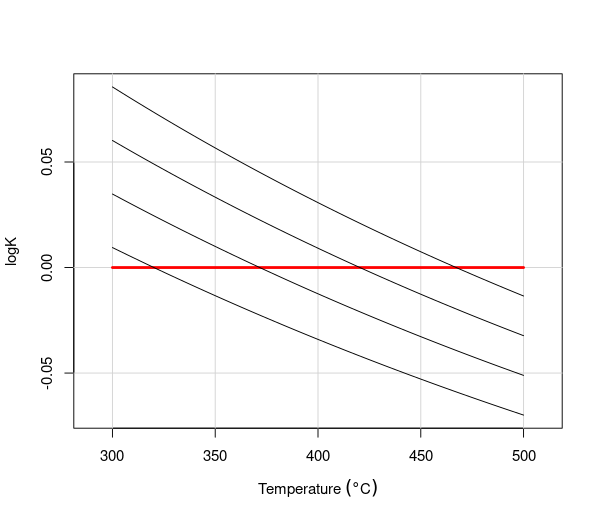

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 600.57474916388 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 600.57474916388 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 600.57474916388 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 600.57474916388 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 600.57474916388 K and above exceed limit for aragonite cr (extrapolating G)

subcrt: 2 species at 300 values of T (ºC) and P (bar) [energy units: cal]

subcrt: temperature(s) of 600.57474

,coeff,name,formula,state,ispecies
769,-1,calcite,CaCO3,cr,769.0
820,1,aragonite,CaCO3,cr,820.0


,P,T,logK,G,H,S,V,Cp
1,7000.0,320.169,0.0,-0.0,-741.0,-1.2,-2.8,-1.1
2,8000.0,371.647,0.0,-0.0,-860.0,-1.3,-2.8,-0.9
3,9000.0,420.368,-0.0,0.0,-968.0,-1.4,-2.8,-0.8
4,10000.0,467.215,-0.0,0.0,-1068.0,-1.4,-2.8,-0.6


In [4]:
unicurve(solve="T", # solving for temperature
         logK=0, # desired logK
         species=["calcite", "aragonite"], # chemical species
         state=["cr", "cr"], # aq, gas, liq, cr
         coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
         pressures=[7000, 8000, 9000, 10000], # the pressures used to calculate temperature
         minT=300, maxT=500, # the minimum and maximum in a range of temperatures to search
         plot_it=True, # visualize results
         messages=True, # print messages
         )

End of demo.